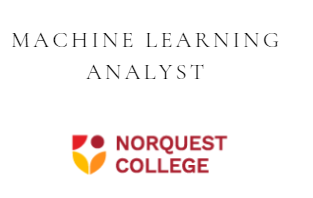

# Notes

### Goals:

1. **Optimize Classroom Allocation**: Ensure that the size of the classrooms matches the enrollment for each class to avoid overcrowding or underutilization.

2. **Improve Scheduling Efficiency**: Adjust class schedules to ensure that classrooms are used optimally throughout the day and week.

Most common prediction: Maximum Occupancy

Our goal is to predict Max Occupancy and based on this value determine the optimal Facility ID ( 8 unique values) based on facilty capacity (45 & 55)

# Client notes

Drop Class start time , traffic in/ traffic out - not reliable

If you intend on keeping these columns, state your reason clearly.

# Exploratory Data Analysis

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Copy of Class_Occupancy_Data.csv')

In [ ]:
# Display the first few rows of the dataset
data.head()

,Record_Date,Record_Time,Course_ID,Term_TermCode,Class_ClassSection,ClassEnrolment_EnrolmentCapacity,ClassEnrolment_EnrolmentTotal,Course_CatalogNumber,CourseCatalog_CourseTitleCode,CourseCatalog_CourseTitleName,...,Meeting_ClassEndDate,Class_Start_Time,Class_End_Time,Facility_ID,Facility_PersonCapacity,Day_of_Week,Max_Occupancy,Max_Occupancy_Perc,Traffic_In,Traffic_Out
0,2021-09-28,10:30:00,1624,1214,H01,60,37,1166,1624,MS Word and Presentations,...,2021-12-08,8:00:00,9:30:00,3-172,45,Tuesday,4,0.088889,0,7
1,2021-09-28,10:45:00,2995,1214,H01,60,53,1007,2995,Business Computer Applications,...,2021-12-08,8:00:00,9:30:00,3-157,55,Tuesday,4,0.072727,4,1
2,2021-09-28,10:45:00,3017,1214,H01,45,44,2019,3017,Strategic Management,...,2021-12-08,8:00:00,9:30:00,3-154,45,Tuesday,0,0.000000,0,0
3,2021-09-28,10:45:00,2992,1214,H04,60,58,1004,2992,Introduction to Accounting,...,2021-12-08,9:30:00,11:00:00,3-172,45,Tuesday,0,0.000000,0,0
4,2021-09-28,10:45:00,1624,1214,H01,60,37,1166,1624,MS Word and Presentations,...,2021-12-08,8:00:00,9:30:00,3-172,45,Tuesday,0,0.000000,0,0


In [ ]:
data.shape

(32125, 28)

In [ ]:
data.nunique()

Record_Date                         212
Record_Time                          53
Course_ID                            95
Term_TermCode                         4
Class_ClassSection                   45
ClassEnrolment_EnrolmentCapacity     17
ClassEnrolment_EnrolmentTotal        43
Course_CatalogNumber                 68
CourseCatalog_CourseTitleCode        95
CourseCatalog_CourseTitleName        95
Class_ClassNumber                   237
Class_ClassName                      92
Class_ClassStatus                     1
Class_InstructionMode                 5
CourseOffer_Subject                  28
Class_StartDate                      11
Class_EndDate                        28
Meeting_ClassStartDate               39
Meeting_ClassEndDate                 50
Class_Start_Time                     11
Class_End_Time                       11
Facility_ID                           8
Facility_PersonCapacity               2
Day_of_Week                           5
Max_Occupancy                        44


# Dataset Features
List the dataset features and descriptions


In [ ]:
data.dtypes

Record_Date                          object
Record_Time                          object
Course_ID                             int64
Term_TermCode                         int64
Class_ClassSection                   object
ClassEnrolment_EnrolmentCapacity      int64
ClassEnrolment_EnrolmentTotal         int64
Course_CatalogNumber                  int64
CourseCatalog_CourseTitleCode         int64
CourseCatalog_CourseTitleName        object
Class_ClassNumber                     int64
Class_ClassName                      object
Class_ClassStatus                    object
Class_InstructionMode                object
CourseOffer_Subject                  object
Class_StartDate                      object
Class_EndDate                        object
Meeting_ClassStartDate               object
Meeting_ClassEndDate                 object
Class_Start_Time                     object
Class_End_Time                       object
Facility_ID                          object
Facility_PersonCapacity         

In [ ]:
#  convert Record_date to datetime

data['Record_Date'] = pd.to_datetime(data['Record_Date'])
data['Record_Time'] = pd.to_datetime(data['Record_Time'])

<ipython-input-6-1449d656b192>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Record_Time'] = pd.to_datetime(data['Record_Time'])


In [ ]:
data['Class_StartDate'] = pd.to_datetime(data['Class_StartDate'])
data['Class_EndDate'] = pd.to_datetime(data['Class_EndDate'])
data['Meeting_ClassStartDate'] = pd.to_datetime(data['Meeting_ClassStartDate'])
data['Meeting_ClassEndDate'] = pd.to_datetime(data['Meeting_ClassEndDate'])
data['Class_Start_Time'] = pd.to_datetime(data['Class_Start_Time'])
data['Class_End_Time'] = pd.to_datetime(data['Class_End_Time'])


<ipython-input-7-a98fc53ad1a4>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Class_Start_Time'] = pd.to_datetime(data['Class_Start_Time'])
<ipython-input-7-a98fc53ad1a4>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Class_End_Time'] = pd.to_datetime(data['Class_End_Time'])


In [ ]:
#  convert Course_ID to category

data['Course_ID'] = data['Course_ID'].astype('category')
data['Term_TermCode'] = data['Term_TermCode'].astype('category')


In [ ]:
data['Class_ClassSection'] = data['Class_ClassSection'].astype('category')


In [ ]:
data['Course_CatalogNumber'] = data['Course_CatalogNumber'].astype('category')
data['CourseCatalog_CourseTitleCode'] = data['CourseCatalog_CourseTitleCode'].astype('category')
data['CourseCatalog_CourseTitleName'] = data['CourseCatalog_CourseTitleName'].astype('category')


In [ ]:
data['Class_ClassNumber'] = data['Class_ClassNumber'].astype('category')

data['Class_ClassName'] = data['Class_ClassName'].astype('category')
data['Class_ClassStatus'] = data['Class_ClassStatus'].astype('category')
data['Class_InstructionMode'] = data['Class_InstructionMode'].astype('category')
data['CourseOffer_Subject'] = data['CourseOffer_Subject'].astype('category')
data['Facility_ID'] = data['Facility_ID'].astype('category')
data['Facility_PersonCapacity'] = data['Facility_PersonCapacity'].astype('category')
data['Day_of_Week'] = data['Day_of_Week'].astype('category')



# Import Libraries

In [ ]:
import numpy as np


# Data Cleaning

In [ ]:
#  missing values in data?

data.isnull().sum()


Record_Date                         0
Record_Time                         0
Course_ID                           0
Term_TermCode                       0
Class_ClassSection                  0
ClassEnrolment_EnrolmentCapacity    0
ClassEnrolment_EnrolmentTotal       0
Course_CatalogNumber                0
CourseCatalog_CourseTitleCode       0
CourseCatalog_CourseTitleName       0
Class_ClassNumber                   0
Class_ClassName                     0
Class_ClassStatus                   0
Class_InstructionMode               0
CourseOffer_Subject                 0
Class_StartDate                     0
Class_EndDate                       0
Meeting_ClassStartDate              0
Meeting_ClassEndDate                0
Class_Start_Time                    0
Class_End_Time                      0
Facility_ID                         0
Facility_PersonCapacity             0
Day_of_Week                         0
Max_Occupancy                       0
Max_Occupancy_Perc                  0
Traffic_In  

In [ ]:
# Get descriptive statistics of the numerical columns
data.describe()

,Record_Date,Record_Time,ClassEnrolment_EnrolmentCapacity,ClassEnrolment_EnrolmentTotal,Class_StartDate,Class_EndDate,Meeting_ClassStartDate,Meeting_ClassEndDate,Class_Start_Time,Class_End_Time,Max_Occupancy,Max_Occupancy_Perc,Traffic_In,Traffic_Out
count,32125,32125,32125.000000,32125.000000,32125,32125,32125,32125,32125,32125,32125.000000,32125.000000,32125.000000,32125.000000
mean,2022-02-14 15:48:27.007003904,2024-04-18 12:46:50.157198080,40.373541,33.103066,2021-12-24 12:39:17.341634048,2022-03-31 14:38:15.259143936,2021-12-26 06:51:29.556419840,2022-03-28 12:12:31.713618944,2024-04-18 11:38:30.555641856,2024-04-18 13:55:08.301945600,3.932794,0.079621,0.776405,0.877852
min,2021-09-28 00:00:00,2024-04-18 08:00:00,13.000000,11.000000,2021-08-30 00:00:00,2021-10-08 00:00:00,2021-08-30 00:00:00,2021-10-01 00:00:00,2024-04-18 08:00:00,2024-04-18 09:30:00,0.000000,0.000000,0.000000,0.000000
25%,2021-11-30 00:00:00,2024-04-18 10:15:00,37.000000,25.000000,2021-08-30 00:00:00,2021-12-16 00:00:00,2021-08-30 00:00:00,2021-12-08 00:00:00,2024-04-18 09:00:00,2024-04-18 11:00:00,0.000000,0.000000,0.000000,0.000000
50%,2022-02-16 00:00:00,2024-04-18 12:30:00,37.000000,35.000000,2022-01-05 00:00:00,2022-04-15 00:00:00,2022-01-05 00:00:00,2022-04-15 00:00:00,2024-04-18 12:30:00,2024-04-18 14:00:00,0.000000,0.000000,0.000000,0.000000
75%,2022-04-08 00:00:00,2024-04-18 15:00:00,45.000000,37.000000,2022-01-05 00:00:00,2022-04-22 00:00:00,2022-01-05 00:00:00,2022-04-22 00:00:00,2024-04-18 14:00:00,2024-04-18 15:30:00,5.000000,0.111111,0.000000,0.000000
max,2022-08-18 00:00:00,2024-04-18 21:00:00,60.000000,60.000000,2022-07-04 00:00:00,2022-08-19 00:00:00,2022-07-04 00:00:00,2022-08-19 00:00:00,2024-04-18 19:30:00,2024-04-18 21:00:00,44.000000,0.977778,42.000000,44.000000
std,NaN,NaN,9.946569,10.975712,NaN,NaN,NaN,NaN,NaN,NaN,6.504880,0.132321,2.387429,2.853152


In [ ]:
# # Check the distribution of categorical columns
# for col in data.select_dtypes(include='category'):
#     print(f"{col}:")
#     print(data[col].value_counts())
#     print()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

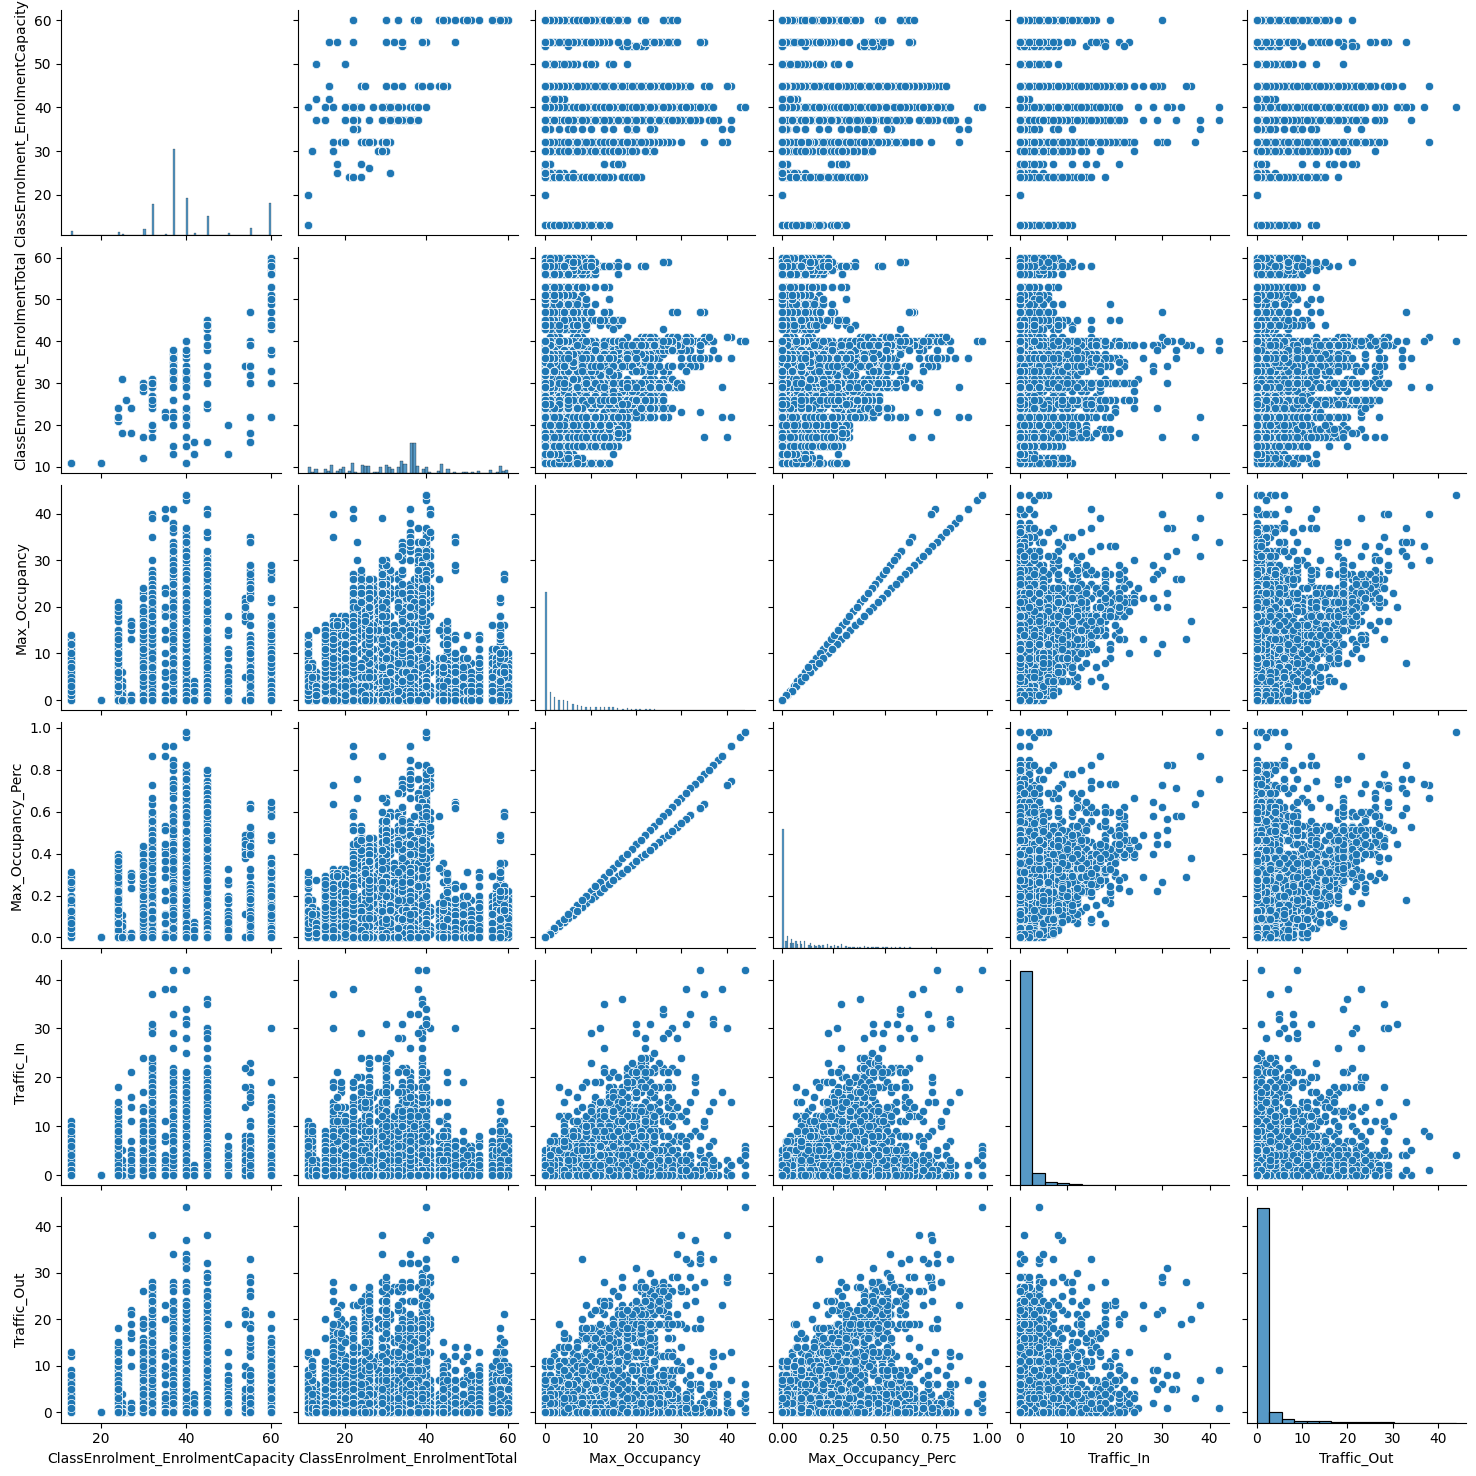

In [ ]:
# Analyze the relationship between numerical columns
sns.pairplot(data)
plt.show()


Maximum Occupancy and Maximum Occupancy rate strogly correlate and are dependent variables. We would need to drop one or the other and predict one or the other

In [ ]:
# Identify the most popular courses based on enrollment.
most_popular_courses = data['CourseCatalog_CourseTitleName'].value_counts().head(10)
print("Most popular courses:")
print(most_popular_courses)

Most popular courses:
CourseCatalog_CourseTitleName
CLB 6                                               1605
Introduction to Accounting                          1570
Microeconomics                                      1421
Business Math                                       1386
Macroeconomics                                      1344
Business Computer Applications                      1169
Organizational Behaviour                            1010
Health Education: Individual Health and Wellness     806
CLB 4                                                805
Human Resource Management I                          805
Name: count, dtype: int64


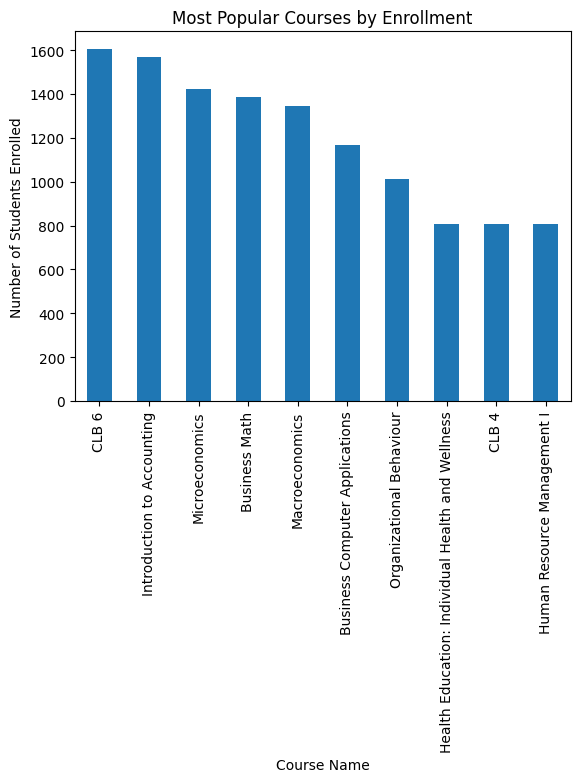

In [ ]:
# Create a bar chart to visualize the most popular courses based on enrollment.
most_popular_courses.plot(kind='bar')
plt.title('Most Popular Courses by Enrollment')
plt.xlabel('Course Name')
plt.ylabel('Number of Students Enrolled')
plt.show()

In [ ]:
# Calculate the average room utilization rate for each facility.
avg_utilization_rate = data.groupby('Facility_ID')['Max_Occupancy'].mean()
print("Average room utilization rate for each facility:")
print(avg_utilization_rate)

Average room utilization rate for each facility:
Facility_ID
3-154    2.557645
3-157    4.732161
3-160    3.198808
3-163    5.055121
3-166    5.117562
3-169    3.980111
3-172    3.539980
3-175    3.631887
Name: Max_Occupancy, dtype: float64


All on the 3rd floor ( Smaller dataset used ) and average of 5 people in attendance. Huge red flag

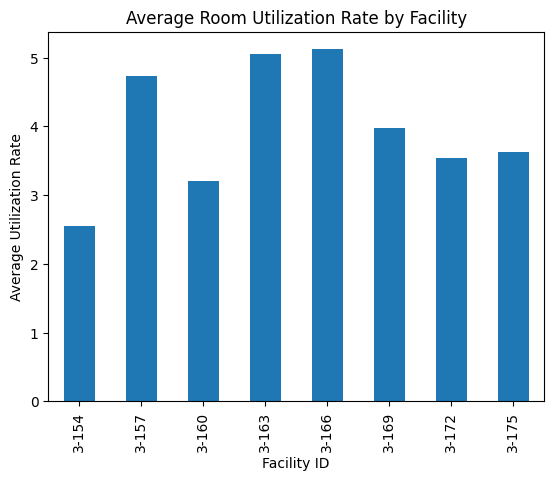

In [ ]:
# Create a bar chart to visualize the average room utilization rate for each facility.
avg_utilization_rate.plot(kind='bar')
plt.title('Average Room Utilization Rate by Facility')
plt.xlabel('Facility ID')
plt.ylabel('Average Utilization Rate')
plt.show()

In [ ]:
# Find the days with the highest and lowest average room utilization.
highest_utilization_day = data.groupby('Day_of_Week')['Max_Occupancy'].mean().idxmax()
lowest_utilization_day = data.groupby('Day_of_Week')['Max_Occupancy'].mean().idxmin()
print(f"Highest average room utilization on {highest_utilization_day}")
print(f"Lowest average room utilization on {lowest_utilization_day}")

Highest average room utilization on Tuesday
Lowest average room utilization on Wednesday


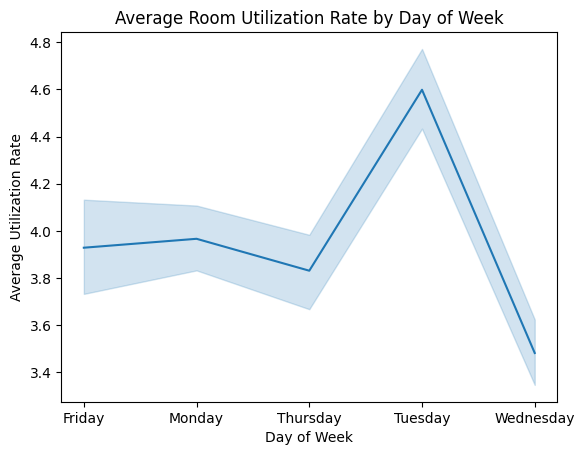

In [ ]:
# Create a line chart to visualize the average room utilization rate for each day of the week.
sns.lineplot(data=data, x='Day_of_Week', y='Max_Occupancy')
plt.title('Average Room Utilization Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Utilization Rate')
plt.show()

In [ ]:
# Identify the time of day with the highest and lowest average room utilization.
data['Hour'] = data['Class_Start_Time'].dt.hour
highest_utilization_hour = data.groupby('Hour')['Max_Occupancy'].mean().idxmax()
lowest_utilization_hour = data.groupby('Hour')['Max_Occupancy'].mean().idxmin()
print(f"Highest average room utilization at {highest_utilization_hour} hour")
print(f"Lowest average room utilization at {lowest_utilization_hour} hour")

Highest average room utilization at 19 hour
Lowest average room utilization at 17 hour


In [ ]:
# Discover the most common class start and end times.
most_common_start_time = data['Class_Start_Time'].dt.hour.value_counts().idxmax()
most_common_end_time = data['Class_End_Time'].dt.hour.value_counts().idxmax()
print(f"Most common class start time: {most_common_start_time}")
print(f"Most common class end time: {most_common_end_time}")

Most common class start time: 8
Most common class end time: 11


In [ ]:
# prompt: get Least common class start and end time

least_common_start_time = data['Class_Start_Time'].dt.hour.value_counts().sort_values(ascending=True).index[0]
least_common_end_time = data['Class_End_Time'].dt.hour.value_counts().sort_values(ascending=True).index[0]
print(f"Least common class start time: {least_common_start_time}")
print(f"Least common class end time: {least_common_end_time}")


Least common class start time: 13
Least common class end time: 16


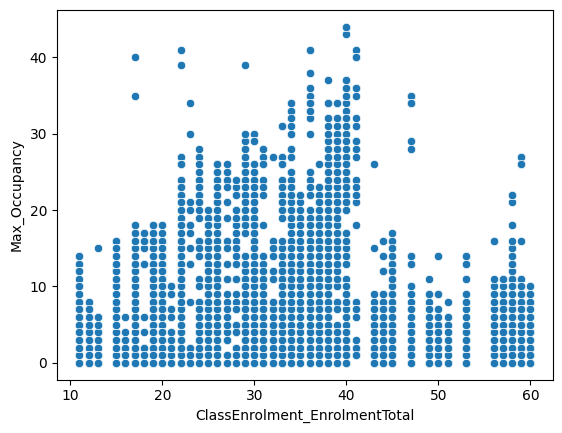

In [ ]:
# Analyze the relationship between class size and room utilization.
sns.scatterplot(data=data, x='ClassEnrolment_EnrolmentTotal', y='Max_Occupancy')
plt.show()

NO correlation. For future reference/ feedback loop ,if changes are implemented we want to see some correlation with class size and Max Occupancy.

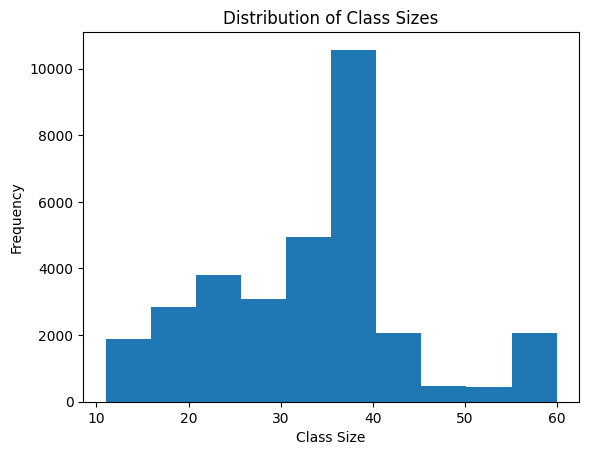

In [ ]:
# Create a histogram to visualize the distribution of class sizes based on Enrollment.
plt.hist(data['ClassEnrolment_EnrolmentTotal'], bins=10)
plt.title('Distribution of Class Sizes')
plt.xlabel('Class Size')
plt.ylabel('Frequency')
plt.show()

Shows good enrollment rates with mostly 40 -45 enrollments. The problem is attendance. Max_occupancy

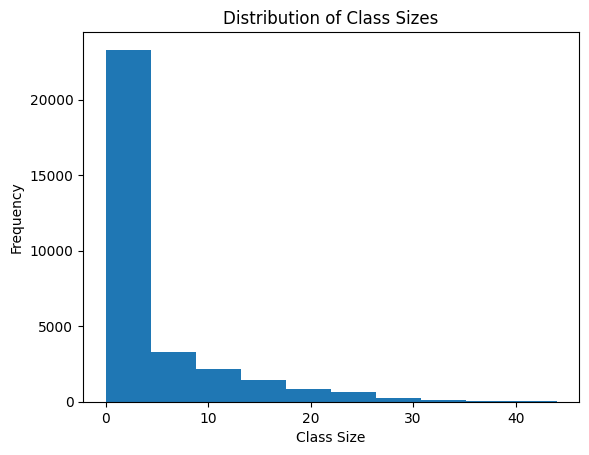

In [ ]:
#  Create a histogram to visualize the distribution of class sizes based on Max_Occupancy

import matplotlib.pyplot as plt
plt.hist(data['Max_Occupancy'], bins=10)
plt.title('Distribution of Class Sizes')
plt.xlabel('Class Size')
plt.ylabel('Frequency')
plt.show()


Poor attendance. Mostly less than 10 in attendance

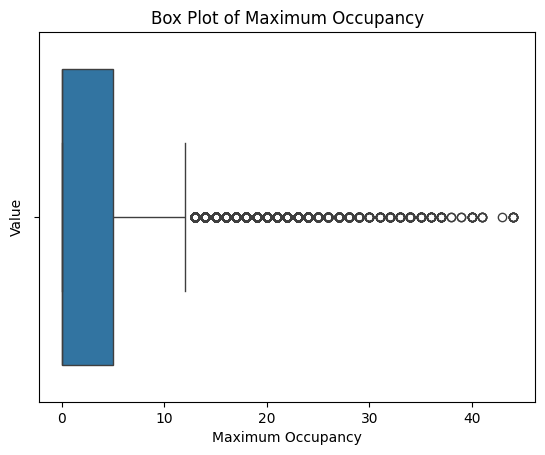

In [ ]:
# Create a box plot for the Max_Occupancy column.
sns.boxplot(x=data['Max_Occupancy'])
plt.title('Box Plot of Maximum Occupancy')
plt.xlabel('Maximum Occupancy')
plt.ylabel('Value')
plt.show()

# What are these high attendance courses that are outliers?

In [ ]:
#  visualize CourseCatalog_CourseTitleName with Max_Occupancy greater than 20. sort

# Filter the data to include only courses with Max_Occupancy greater than 20
filtered_data = data[data['Max_Occupancy'] > 20]

In [ ]:
filtered_data.shape

(1290, 29)

In [ ]:
filtered_data.head(10)

,Record_Date,Record_Time,Course_ID,Term_TermCode,Class_ClassSection,ClassEnrolment_EnrolmentCapacity,ClassEnrolment_EnrolmentTotal,Course_CatalogNumber,CourseCatalog_CourseTitleCode,CourseCatalog_CourseTitleName,...,Class_Start_Time,Class_End_Time,Facility_ID,Facility_PersonCapacity,Day_of_Week,Max_Occupancy,Max_Occupancy_Perc,Traffic_In,Traffic_Out,Hour
37,2021-09-28,2024-04-18 12:30:00,2992,1214,H07,60,58,1004,2992,Introduction to Accounting,...,2024-04-18 11:00:00,2024-04-18 12:30:00,3-166,45,Tuesday,21,0.466667,4,0,11
38,2021-09-28,2024-04-18 12:30:00,3461,1214,X01,60,37,1168,3461,MS Excel,...,2024-04-18 09:30:00,2024-04-18 11:00:00,3-166,45,Tuesday,21,0.466667,4,0,9
45,2021-09-28,2024-04-18 13:00:00,2992,1214,H07,60,58,1004,2992,Introduction to Accounting,...,2024-04-18 11:00:00,2024-04-18 12:30:00,3-166,45,Tuesday,22,0.488889,1,0,11
49,2021-09-28,2024-04-18 13:15:00,2992,1214,H07,60,58,1004,2992,Introduction to Accounting,...,2024-04-18 11:00:00,2024-04-18 12:30:00,3-166,45,Tuesday,22,0.488889,0,0,11
53,2021-09-28,2024-04-18 13:30:00,2992,1214,H07,60,58,1004,2992,Introduction to Accounting,...,2024-04-18 11:00:00,2024-04-18 12:30:00,3-166,45,Tuesday,22,0.488889,0,11,11
583,2021-10-01,2024-04-18 12:30:00,2443,1214,A01,30,28,2510,2443,Scientific and Technical Writing,...,2024-04-18 12:30:00,2024-04-18 15:30:00,3-175,55,Monday,23,0.418182,24,1,12
589,2021-10-01,2024-04-18 14:00:00,2443,1214,A01,30,28,2510,2443,Scientific and Technical Writing,...,2024-04-18 12:30:00,2024-04-18 15:30:00,3-175,55,Monday,23,0.418182,0,0,12
595,2021-10-01,2024-04-18 14:30:00,2443,1214,A01,30,28,2510,2443,Scientific and Technical Writing,...,2024-04-18 12:30:00,2024-04-18 15:30:00,3-175,55,Monday,24,0.436364,1,0,12
601,2021-10-01,2024-04-18 15:00:00,2443,1214,A01,30,28,2510,2443,Scientific and Technical Writing,...,2024-04-18 12:30:00,2024-04-18 15:30:00,3-175,55,Monday,24,0.436364,1,1,12
607,2021-10-01,2024-04-18 15:30:00,2443,1214,A01,30,28,2510,2443,Scientific and Technical Writing,...,2024-04-18 12:30:00,2024-04-18 15:30:00,3-175,55,Monday,24,0.436364,4,11,12


In [ ]:
#  sort filtered_data by Max_Occupancy and show top rows

# Sort the filtered data by Max_Occupancy in descending order
sorted_data = filtered_data.sort_values(by='Max_Occupancy', ascending=False)

# Show the top  rows of the sorted data
sorted_data.head()


,Record_Date,Record_Time,Course_ID,Term_TermCode,Class_ClassSection,ClassEnrolment_EnrolmentCapacity,ClassEnrolment_EnrolmentTotal,Course_CatalogNumber,CourseCatalog_CourseTitleCode,CourseCatalog_CourseTitleName,...,Class_Start_Time,Class_End_Time,Facility_ID,Facility_PersonCapacity,Day_of_Week,Max_Occupancy,Max_Occupancy_Perc,Traffic_In,Traffic_Out,Hour
9224,2022-01-05,2024-04-18 16:30:00,2828,1221,A01,40,40,1007,2828,Literacy,...,2024-04-18 11:00:00,2024-04-18 14:00:00,3-166,45,Friday,44,0.977778,42,1,11
9230,2022-01-05,2024-04-18 16:45:00,2828,1221,A01,40,40,1007,2828,Literacy,...,2024-04-18 11:00:00,2024-04-18 14:00:00,3-166,45,Friday,44,0.977778,5,4,11
9228,2022-01-05,2024-04-18 16:45:00,2828,1221,A01,40,40,1007,2828,Literacy,...,2024-04-18 11:00:00,2024-04-18 14:00:00,3-166,45,Friday,44,0.977778,6,3,11
9227,2022-01-05,2024-04-18 16:45:00,2828,1221,A01,40,40,1007,2828,Literacy,...,2024-04-18 11:00:00,2024-04-18 14:00:00,3-166,45,Friday,44,0.977778,2,6,11
9226,2022-01-05,2024-04-18 16:30:00,2828,1221,A01,40,40,1007,2828,Literacy,...,2024-04-18 11:00:00,2024-04-18 14:00:00,3-166,45,Friday,44,0.977778,0,1,11


We are seeing 97% attendance for these courses. What are these mystery courses.

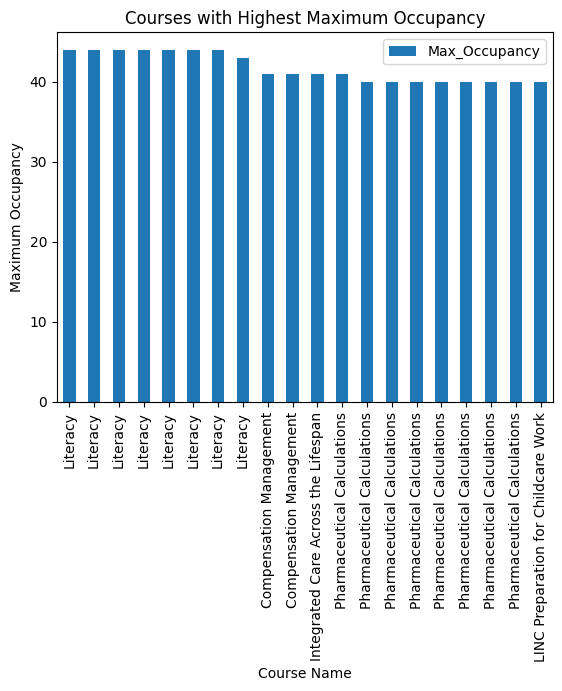

In [ ]:
#  visualize sorted_data.head(20) by Course Name. Top 20 only

import matplotlib.pyplot as plt
sorted_data.head(20).plot(kind='bar', x='CourseCatalog_CourseTitleName', y='Max_Occupancy')
plt.title('Courses with Highest Maximum Occupancy')
plt.xlabel('Course Name')
plt.ylabel('Maximum Occupancy')
plt.xticks(rotation=90)
plt.show()


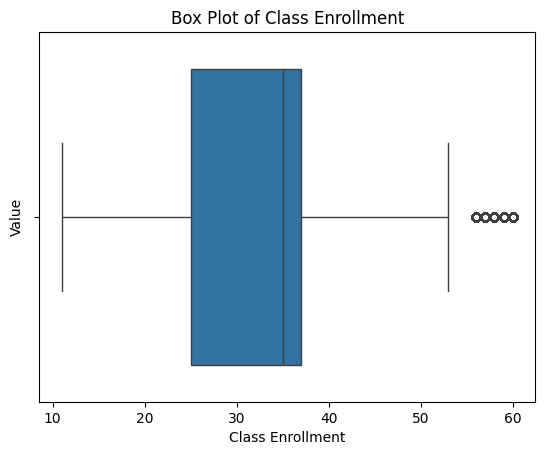

In [ ]:
# Create a box plot for the ClassEnrolment_EnrolmentTotal column.
sns.boxplot(x=data['ClassEnrolment_EnrolmentTotal'])
plt.title('Box Plot of Class Enrollment')
plt.xlabel('Class Enrollment')
plt.ylabel('Value')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the string columns
for col in data.select_dtypes(include=["object"]):
    # Fit the encoder to the data
    le.fit(data[col])
    # Transform the string values into numeric values
    data[col] = le.transform(data[col])

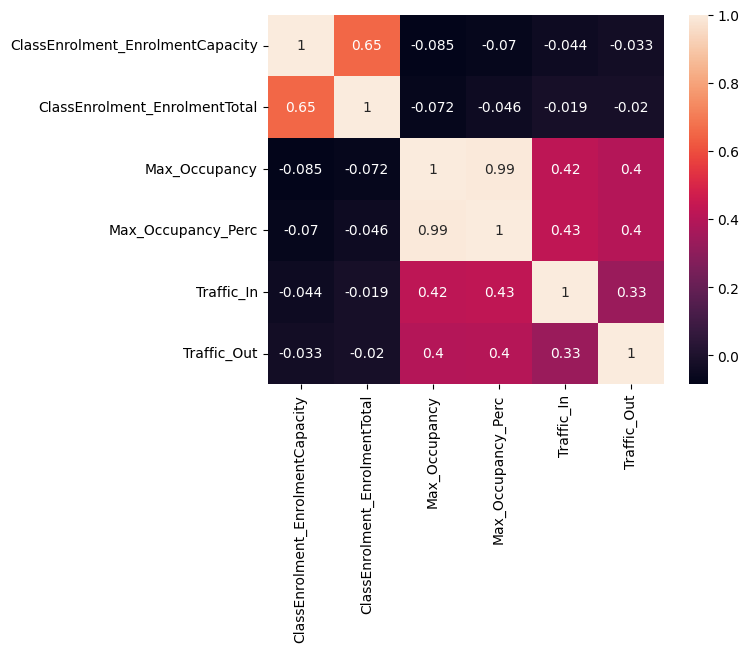

In [ ]:

# Create a correlation matrix
numeric_data = data.select_dtypes(include=["int64", "float64"])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()



# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()


Note that we would be dropping either Max_Occupancy or Max_Occupancy rate depending on what we intend to predict.

# Feature Engineering

In [ ]:
data.nunique()

Record_Date                         212
Record_Time                          53
Course_ID                            95
Term_TermCode                         4
Class_ClassSection                   45
ClassEnrolment_EnrolmentCapacity     17
ClassEnrolment_EnrolmentTotal        43
Course_CatalogNumber                 68
CourseCatalog_CourseTitleCode        95
CourseCatalog_CourseTitleName        95
Class_ClassNumber                   237
Class_ClassName                      92
Class_ClassStatus                     1
Class_InstructionMode                 5
CourseOffer_Subject                  28
Class_StartDate                      11
Class_EndDate                        28
Meeting_ClassStartDate               39
Meeting_ClassEndDate                 50
Class_Start_Time                     11
Class_End_Time                       11
Facility_ID                           8
Facility_PersonCapacity               2
Day_of_Week                           5
Max_Occupancy                        44


Client recommended dropping class start time, class end time and to use class meeting time

Drop traffic in and out - unreliable tracking


*   CourseCatalog_CourseTitleCode        95
*   Course ID                            95
*   CourseCatalog_CourseTitleName        95

  All 95. Likely the same. Drop 2 and keep only course title name




In [ ]:
#drop Class_Start_Time ,
# Class_End_Time ,     Traffic_In,
# Traffic_Out ,  CourseCatalog_CourseTitleCode  , Course_ID

data = data.drop(columns=['Class_Start_Time', 'Class_End_Time', 'Traffic_In', 'Traffic_Out', 'CourseCatalog_CourseTitleCode', 'Course_ID'])


In [ ]:
data.nunique()

Record_Date                         212
Record_Time                          53
Term_TermCode                         4
Class_ClassSection                   45
ClassEnrolment_EnrolmentCapacity     17
ClassEnrolment_EnrolmentTotal        43
Course_CatalogNumber                 68
CourseCatalog_CourseTitleName        95
Class_ClassNumber                   237
Class_ClassName                      92
Class_ClassStatus                     1
Class_InstructionMode                 5
CourseOffer_Subject                  28
Class_StartDate                      11
Class_EndDate                        28
Meeting_ClassStartDate               39
Meeting_ClassEndDate                 50
Facility_ID                           8
Facility_PersonCapacity               2
Day_of_Week                           5
Max_Occupancy                        44
Max_Occupancy_Perc                   77
Hour                                 10
dtype: int64

We have record date and time and class start date and time. we'd be dropping class start date and time as recommended by client

In [ ]:
data.head()

,Record_Date,Record_Time,Term_TermCode,Class_ClassSection,ClassEnrolment_EnrolmentCapacity,ClassEnrolment_EnrolmentTotal,Course_CatalogNumber,CourseCatalog_CourseTitleName,Class_ClassNumber,Class_ClassName,...,Class_StartDate,Class_EndDate,Meeting_ClassStartDate,Meeting_ClassEndDate,Facility_ID,Facility_PersonCapacity,Day_of_Week,Max_Occupancy,Max_Occupancy_Perc,Hour
0,2021-09-28,2024-04-18 10:30:00,1214,H01,60,37,1166,MS Word and Presentations,40256,MS Word and Presenta,...,2021-08-30,2021-12-08,2021-08-30,2021-12-08,3-172,45,Tuesday,4,0.088889,8
1,2021-09-28,2024-04-18 10:45:00,1214,H01,60,53,1007,Business Computer Applications,40191,Business Computer Ap,...,2021-08-30,2021-12-08,2021-08-30,2021-12-08,3-157,55,Tuesday,4,0.072727,8
2,2021-09-28,2024-04-18 10:45:00,1214,H01,45,44,2019,Strategic Management,40248,Strategic Management,...,2021-08-30,2021-12-08,2021-08-30,2021-12-08,3-154,45,Tuesday,0,0.000000,8
3,2021-09-28,2024-04-18 10:45:00,1214,H04,60,58,1004,Introduction to Accounting,40167,Introduction to Acco,...,2021-08-30,2021-12-08,2021-08-30,2021-12-08,3-172,45,Tuesday,0,0.000000,9
4,2021-09-28,2024-04-18 10:45:00,1214,H01,60,37,1166,MS Word and Presentations,40256,MS Word and Presenta,...,2021-08-30,2021-12-08,2021-08-30,2021-12-08,3-172,45,Tuesday,0,0.000000,8


In [ ]:
data = data.drop(columns=['Class_StartDate',	'Class_EndDate'])

In [ ]:
data.head()

,Record_Date,Record_Time,Term_TermCode,Class_ClassSection,ClassEnrolment_EnrolmentCapacity,ClassEnrolment_EnrolmentTotal,Course_CatalogNumber,CourseCatalog_CourseTitleName,Class_ClassNumber,Class_ClassName,...,Class_InstructionMode,CourseOffer_Subject,Meeting_ClassStartDate,Meeting_ClassEndDate,Facility_ID,Facility_PersonCapacity,Day_of_Week,Max_Occupancy,Max_Occupancy_Perc,Hour
0,2021-09-28,2024-04-18 10:30:00,1214,H01,60,37,1166,MS Word and Presentations,40256,MS Word and Presenta,...,Hyflex,BUSN,2021-08-30,2021-12-08,3-172,45,Tuesday,4,0.088889,8
1,2021-09-28,2024-04-18 10:45:00,1214,H01,60,53,1007,Business Computer Applications,40191,Business Computer Ap,...,Hyflex,BUSD,2021-08-30,2021-12-08,3-157,55,Tuesday,4,0.072727,8
2,2021-09-28,2024-04-18 10:45:00,1214,H01,45,44,2019,Strategic Management,40248,Strategic Management,...,Hyflex,BUSD,2021-08-30,2021-12-08,3-154,45,Tuesday,0,0.000000,8
3,2021-09-28,2024-04-18 10:45:00,1214,H04,60,58,1004,Introduction to Accounting,40167,Introduction to Acco,...,Hyflex,BUSD,2021-08-30,2021-12-08,3-172,45,Tuesday,0,0.000000,9
4,2021-09-28,2024-04-18 10:45:00,1214,H01,60,37,1166,MS Word and Presentations,40256,MS Word and Presenta,...,Hyflex,BUSN,2021-08-30,2021-12-08,3-172,45,Tuesday,0,0.000000,8


Meeting start date and end date is also redundant since we have record date

In [ ]:
data = data.drop(columns=['Meeting_ClassStartDate',	'Meeting_ClassEndDate'])

Optimizing class schedule

In [ ]:
data.nunique()

Record_Date                         212
Record_Time                          53
Term_TermCode                         4
Class_ClassSection                   45
ClassEnrolment_EnrolmentCapacity     17
ClassEnrolment_EnrolmentTotal        43
Course_CatalogNumber                 68
CourseCatalog_CourseTitleName        95
Class_ClassNumber                   237
Class_ClassName                      92
Class_ClassStatus                     1
Class_InstructionMode                 5
CourseOffer_Subject                  28
Facility_ID                           8
Facility_PersonCapacity               2
Day_of_Week                           5
Max_Occupancy                        44
Max_Occupancy_Perc                   77
Hour                                 10
dtype: int64

In [ ]:
#  list Facility ID values. It has only 2 unique values

data['Facility_PersonCapacity'].unique()


[45, 55]
Categories (2, int64): [45, 55]

In [ ]:
#  list Facility ID values. It has only 8 unique values
data['Facility_ID'].unique()

['3-172', '3-157', '3-154', '3-166', '3-163', '3-169', '3-160', '3-175']
Categories (8, object): ['3-154', '3-157', '3-160', '3-163', '3-166', '3-169', '3-172', '3-175']

All on the 3rd floor. Small dataset used.

In [ ]:
data.head()

,Record_Date,Record_Time,Term_TermCode,Class_ClassSection,ClassEnrolment_EnrolmentCapacity,ClassEnrolment_EnrolmentTotal,Course_CatalogNumber,CourseCatalog_CourseTitleName,Class_ClassNumber,Class_ClassName,Class_ClassStatus,Class_InstructionMode,CourseOffer_Subject,Facility_ID,Facility_PersonCapacity,Day_of_Week,Max_Occupancy,Max_Occupancy_Perc,Hour
0,2021-09-28,2024-04-18 10:30:00,1214,H01,60,37,1166,MS Word and Presentations,40256,MS Word and Presenta,Active,Hyflex,BUSN,3-172,45,Tuesday,4,0.088889,8
1,2021-09-28,2024-04-18 10:45:00,1214,H01,60,53,1007,Business Computer Applications,40191,Business Computer Ap,Active,Hyflex,BUSD,3-157,55,Tuesday,4,0.072727,8
2,2021-09-28,2024-04-18 10:45:00,1214,H01,45,44,2019,Strategic Management,40248,Strategic Management,Active,Hyflex,BUSD,3-154,45,Tuesday,0,0.000000,8
3,2021-09-28,2024-04-18 10:45:00,1214,H04,60,58,1004,Introduction to Accounting,40167,Introduction to Acco,Active,Hyflex,BUSD,3-172,45,Tuesday,0,0.000000,9
4,2021-09-28,2024-04-18 10:45:00,1214,H01,60,37,1166,MS Word and Presentations,40256,MS Word and Presenta,Active,Hyflex,BUSN,3-172,45,Tuesday,0,0.000000,8


# Visualizations with Dash

In [ ]:
pip install dash


In [ ]:
import dash
import plotly.express as px

In [ ]:

# Create a Dash application
app = dash.Dash(__name__)

# Create a scatter plot of class size vs. room utilization
fig1 = px.scatter(data, x='ClassEnrolment_EnrolmentTotal', y='Max_Occupancy')
plt.show()

# Create a bar chart of the most popular courses based on enrollment
fig2 = px.histogram(data, x="ClassEnrolment_EnrolmentTotal", nbins=10, title='Distribution of Class Sizes', labels={'ClassEnrolment_EnrolmentTotal':'Class Size', 'count':'Frequency'})
plt.show()

# Create a line chart of average room utilization by day of the week
fig3 = px.line(data.groupby('Day_of_Week')['Max_Occupancy'].mean().reset_index(), x='Day_of_Week', y='Max_Occupancy')

# Create a layout for the Dash app
app.layout = dash.html.Div(children=[
    dash.html.H1(children='Classroom Utilization Dashboard'),
    dash.dcc.Graph(figure=fig1),
    dash.dcc.Graph(figure=fig2),
    dash.dcc.Graph(figure=fig3)
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px



# Create a Dash application
app = dash.Dash(__name__)

# Create a scatter plot of class size vs. room utilization
fig1 = px.scatter(data, x='ClassEnrolment_EnrolmentTotal', y='Max_Occupancy')

# Create a bar chart of the most popular courses based on enrollment
fig2 = px.histogram(data, x="ClassEnrolment_EnrolmentTotal", nbins=10, title='Distribution of Class Sizes', labels={'ClassEnrolment_EnrolmentTotal':'Class Size', 'count':'Frequency'})

# Create a line chart of average room utilization by day of the week
fig3 = px.line(data.groupby('Day_of_Week')['Max_Occupancy'].mean().reset_index(), x='Day_of_Week', y='Max_Occupancy')

# Create a layout for the Dash app
app.layout = html.Div(children=[
    html.H1(children='Classroom Utilization Dashboard'),
    dcc.Graph(id='scatter-plot', figure=fig1),
    dcc.Graph(id='bar-chart', figure=fig2),
    dcc.Graph(id='line-chart', figure=fig3),
    html.Div(id='recommendation-output')
])

# Add error handling to the callbacks
@app.callback(
    Output('recommendation-output', 'children'),
    [Input('scatter-plot', 'clickData'),
     Input('bar-chart', 'clickData'),
     Input('line-chart', 'clickData')]
)
def display_click_data(scatter_click, bar_click, line_click):
    try:
        # Add your callback logic here
        # For demonstration purposes, just displaying click data
        return f"Scatter plot click data: {scatter_click}, Bar chart click data: {bar_click}, Line chart click data: {line_click}"
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-53-68d1cb44cf09>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-53-68d1cb44cf09>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



<IPython.core.display.Javascript object>

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Create a Dash application
app = dash.Dash(__name__)

# Create initial figures
def create_figures(data):
    # Scatter plot of class size vs. room utilization
    scatter_fig = px.scatter(data, x='ClassEnrolment_EnrolmentTotal', y='Max_Occupancy')

    # Bar chart of the most popular courses based on enrollment
    bar_fig = px.histogram(data, x="ClassEnrolment_EnrolmentTotal", nbins=10, title='Distribution of Class Sizes', labels={'ClassEnrolment_EnrolmentTotal':'Class Size', 'count':'Frequency'})

    # Line chart of average room utilization by day of the week
    line_fig = px.line(data.groupby('Day_of_Week')['Max_Occupancy'].mean().reset_index(), x='Day_of_Week', y='Max_Occupancy')

    return scatter_fig, bar_fig, line_fig

# Create dropdown options for features
def get_dropdown_options(feature):
    return [{'label': value, 'value': value} for value in data[feature].unique()]

# Create a layout for the Dash app
app.layout = html.Div(children=[
    html.H1(children='Classroom Utilization Dashboard'),
    dcc.Graph(id='scatter-plot'),
    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='line-chart'),
    html.Div(id='recommendation-output'),
    html.Div([
        dcc.Dropdown(id='term-dropdown', options=get_dropdown_options('Term_TermCode'), placeholder='Select term'),
        dcc.Dropdown(id='class-section-dropdown', options=get_dropdown_options('Class_ClassSection'), placeholder='Select class section'),
        dcc.Dropdown(id='course-title-dropdown', options=get_dropdown_options('CourseCatalog_CourseTitleName'), placeholder='Select course title'),
        dcc.Dropdown(id='course-subject-dropdown', options=get_dropdown_options('CourseOffer_Subject'), placeholder='Select course subject'),
        dcc.Dropdown(id='instruction-mode-dropdown', options=get_dropdown_options('Class_InstructionMode'), placeholder='Select instruction mode'),
        dcc.Dropdown(id='day-of-week-dropdown', options=get_dropdown_options('Day_of_Week'), placeholder='Select day of week'),
        dcc.Dropdown(id='hour-dropdown', options=get_dropdown_options('Hour'), placeholder='Select hour of the day'),
    ])
])

# Callback to update graphs based on user input
@app.callback(
    [Output('scatter-plot', 'figure'),
     Output('bar-chart', 'figure'),
     Output('line-chart', 'figure')],
    [Input('term-dropdown', 'value'),
     Input('class-section-dropdown', 'value'),
     Input('course-title-dropdown', 'value'),
     Input('course-subject-dropdown', 'value'),
     Input('instruction-mode-dropdown', 'value'),
     Input('day-of-week-dropdown', 'value'),
     Input('hour-dropdown', 'value')]
)
def update_graphs(term, class_section, course_title, course_subject, instruction_mode, day_of_week, hour):
    filtered_data = data.copy()
    if term:
        filtered_data = filtered_data[filtered_data['Term_TermCode'] == term]
    if class_section:
        filtered_data = filtered_data[filtered_data['Class_ClassSection'] == class_section]
    if course_title:
        filtered_data = filtered_data[filtered_data['CourseCatalog_CourseTitleName'] == course_title]
    if course_subject:
        filtered_data = filtered_data[filtered_data['CourseOffer_Subject'] == course_subject]
    if instruction_mode:
        filtered_data = filtered_data[filtered_data['Class_InstructionMode'] == instruction_mode]
    if day_of_week:
        filtered_data = filtered_data[filtered_data['Day_of_Week'] == day_of_week]
    if hour:
        filtered_data = filtered_data[filtered_data['Hour'] == hour]

    scatter_fig = px.scatter(filtered_data, x='ClassEnrolment_EnrolmentTotal', y='Max_Occupancy')
    bar_fig = px.histogram(filtered_data, x="ClassEnrolment_EnrolmentTotal", nbins=10, title='Distribution of Class Sizes', labels={'ClassEnrolment_EnrolmentTotal':'Class Size', 'count':'Frequency'})
    line_fig = px.line(filtered_data.groupby('Day_of_Week')['Max_Occupancy'].mean().reset_index(), x='Day_of_Week', y='Max_Occupancy')

    return scatter_fig, bar_fig, line_fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# Machine Learning

Let's carry out ML with all the columns for now

In [ ]:

import pandas as pd
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Preprocess the data
# Convert categorical variables to numerical using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
data_encoded = encoder.fit_transform(data[['Term_TermCode', 'Class_ClassSection', 'Course_CatalogNumber',  'CourseCatalog_CourseTitleName', 'Class_ClassNumber', 'Class_ClassName', 'Class_ClassStatus', 'Class_InstructionMode', 'CourseOffer_Subject', 'Facility_ID', 'Facility_PersonCapacity', 'Day_of_Week', 'Hour']])

# Separate features and target variable
X = data_encoded
y = data['Max_Occupancy']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

# Analyze the model coefficients to understand the impact of different features on room utilization
coefs = pd.Series(model.coef_, index=encoder.get_feature_names_out())
print(coefs.sort_values(ascending=False))

Mean squared error: 27.091337800801497
Class_ClassNumber_20916    6.131181
Class_ClassNumber_11665    5.510216
Class_ClassSection_X08     5.510216
Class_ClassNumber_21473    5.044870
Class_ClassNumber_10126    4.782733
                             ...   
Class_ClassNumber_10165   -3.301431
Class_ClassNumber_11533   -3.484962
Class_ClassNumber_20082   -3.607192
Class_ClassNumber_10268   -4.049744
Class_ClassNumber_11474   -6.078392
Length: 600, dtype: float64


In [ ]:
# MSE is the square of the error. to calculate actual error
import math
actual_error = math.sqrt(mse)
actual_error

5.204933986209768

So whatever our Max Occupancy prediction is we have an error margin of +/- 5

# show feature importance

In [ ]:

# Get the feature names from the encoder
feature_names = encoder.get_feature_names_out()

# Create a DataFrame of feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})

# Sort the DataFrame by coefficient value in descending order
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Print the feature importance
print(coef_df)


                     Feature  Coefficient
345  Class_ClassNumber_20916     6.131181
311  Class_ClassNumber_11665     5.510216
46    Class_ClassSection_X08     5.510216
361  Class_ClassNumber_21473     5.044870
213  Class_ClassNumber_10126     4.782733
..                       ...          ...
225  Class_ClassNumber_10165    -3.301431
299  Class_ClassNumber_11533    -3.484962
333  Class_ClassNumber_20082    -3.607192
246  Class_ClassNumber_10268    -4.049744
291  Class_ClassNumber_11474    -6.078392

[600 rows x 2 columns]


In [ ]:
#  show topfeatures

# Get the top 10 features with the highest coefficients
top_features = coef_df.head(40)

# Print the top 10 features
print(top_features)


                                               Feature  Coefficient
345                            Class_ClassNumber_20916     6.131181
311                            Class_ClassNumber_11665     5.510216
46                              Class_ClassSection_X08     5.510216
361                            Class_ClassNumber_21473     5.044870
213                            Class_ClassNumber_10126     4.782733
346                            Class_ClassNumber_20930     4.679207
565                           CourseOffer_Subject_PHRM     4.317149
344                            Class_ClassNumber_20896     3.757473
287                            Class_ClassNumber_11432     3.681712
442                            Class_ClassNumber_41693     3.640691
186  CourseCatalog_CourseTitleName_Pharmaceutical C...     3.640691
517               Class_ClassName_Pharmaceutical Calcu     3.640691
384                            Class_ClassNumber_40170     3.376001
325                            Class_ClassNumber

# top features

Class_ClassNumber, Class_ClassSection, CourseCatalog_CourseTitleName, CourseOffer_Subject , Course_CatalogNumber

In [ ]:
data.nunique()

Record_Date                         212
Record_Time                          53
Term_TermCode                         4
Class_ClassSection                   45
ClassEnrolment_EnrolmentCapacity     17
ClassEnrolment_EnrolmentTotal        43
Course_CatalogNumber                 68
CourseCatalog_CourseTitleName        95
Class_ClassNumber                   237
Class_ClassName                      92
Class_ClassStatus                     1
Class_InstructionMode                 5
CourseOffer_Subject                  28
Facility_ID                           8
Facility_PersonCapacity               2
Day_of_Week                           5
Max_Occupancy                        44
Max_Occupancy_Perc                   77
Hour                                 10
dtype: int64

In [ ]:
data.head()

,Record_Date,Record_Time,Term_TermCode,Class_ClassSection,ClassEnrolment_EnrolmentCapacity,ClassEnrolment_EnrolmentTotal,Course_CatalogNumber,CourseCatalog_CourseTitleName,Class_ClassNumber,Class_ClassName,Class_ClassStatus,Class_InstructionMode,CourseOffer_Subject,Facility_ID,Facility_PersonCapacity,Day_of_Week,Max_Occupancy,Max_Occupancy_Perc,Hour
0,2021-09-28,2024-04-18 10:30:00,1214,H01,60,37,1166,MS Word and Presentations,40256,MS Word and Presenta,Active,Hyflex,BUSN,3-172,45,Tuesday,4,0.088889,8
1,2021-09-28,2024-04-18 10:45:00,1214,H01,60,53,1007,Business Computer Applications,40191,Business Computer Ap,Active,Hyflex,BUSD,3-157,55,Tuesday,4,0.072727,8
2,2021-09-28,2024-04-18 10:45:00,1214,H01,45,44,2019,Strategic Management,40248,Strategic Management,Active,Hyflex,BUSD,3-154,45,Tuesday,0,0.000000,8
3,2021-09-28,2024-04-18 10:45:00,1214,H04,60,58,1004,Introduction to Accounting,40167,Introduction to Acco,Active,Hyflex,BUSD,3-172,45,Tuesday,0,0.000000,9
4,2021-09-28,2024-04-18 10:45:00,1214,H01,60,37,1166,MS Word and Presentations,40256,MS Word and Presenta,Active,Hyflex,BUSN,3-172,45,Tuesday,0,0.000000,8


Not all these featueres are logical to be added. Class Number for example has a lot of variability. We can drop this and see how the model performs without it.

# Important!!!

We can create a new dataframe and  keep important features like Term_Term code as that has only 4 unique values, Class Instruction Mode, day of week and hour also have small number of unique values

We need to drop Max_Occupancy perc since it is dependednt on Max_Occupancy.

We also have to drop  Facility ID ( 8 unique features) & Facility person capacity (45 or 55), since our goal is to predict Max Occupancy ad recommend Facility ID and Facility person capacity.

We would therefore not be asking the users for these as input duing prediction

In [ ]:

data3 = data[['Max_Occupancy','Term_TermCode', 'Class_ClassSection', 'CourseCatalog_CourseTitleName', 'CourseOffer_Subject', 'Class_InstructionMode', 'Day_of_Week', 'Hour']]


In [ ]:
data3.head()

,Max_Occupancy,Term_TermCode,Class_ClassSection,CourseCatalog_CourseTitleName,CourseOffer_Subject,Class_InstructionMode,Day_of_Week,Hour
0,4,1214,H01,MS Word and Presentations,BUSN,Hyflex,Tuesday,8
1,4,1214,H01,Business Computer Applications,BUSD,Hyflex,Tuesday,8
2,0,1214,H01,Strategic Management,BUSD,Hyflex,Tuesday,8
3,0,1214,H04,Introduction to Accounting,BUSD,Hyflex,Tuesday,9
4,0,1214,H01,MS Word and Presentations,BUSN,Hyflex,Tuesday,8


In [ ]:
data3.nunique()

Max_Occupancy                    44
Term_TermCode                     4
Class_ClassSection               45
CourseCatalog_CourseTitleName    95
CourseOffer_Subject              28
Class_InstructionMode             5
Day_of_Week                       5
Hour                             10
dtype: int64

In [ ]:
data['Class_ClassSection'].unique() #Just curious

['H01', 'H04', 'X01', 'H12', 'H07', ..., 'X04', 'W06', 'X12', 'X36', 'X05']
Length: 45
Categories (45, object): ['A01', 'A02', 'A03', 'A04', ..., 'X05', 'X08', 'X12', 'X36']

# Download new dataset








In [ ]:
# Download the data3 DataFrame to a CSV file
data3.to_csv('data3.csv', index=False)

# Retrain model with new and improved features

In [ ]:
# Preprocess the data
# Convert categorical variables to numerical using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
data_encoded = encoder.fit_transform(data3[['Term_TermCode', 'Class_ClassSection','CourseCatalog_CourseTitleName', 'Class_InstructionMode', 'CourseOffer_Subject', 'Day_of_Week', 'Hour']])

# Separate features and target variable
X = data_encoded
y = data3['Max_Occupancy']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

# Analyze the model coefficients to understand the impact of different features on room utilization
coefs = pd.Series(model.coef_, index=encoder.get_feature_names_out())
print(coefs.sort_values(ascending=False))

Mean squared error: 28.482526749915603
CourseCatalog_CourseTitleName_Pharmaceutical Calculations    11.228436
Class_ClassSection_X08                                       10.961369
CourseOffer_Subject_PHRM                                      6.382631
Class_ClassSection_DA13                                       6.194201
CourseCatalog_CourseTitleName_CLB 5 - 4 Credit                6.118986
                                                               ...    
CourseOffer_Subject_HLTH                                     -4.045246
CourseOffer_Subject_SOWK                                     -4.419071
CourseCatalog_CourseTitleName_CLB 6                          -5.298563
Class_ClassSection_X36                                       -5.840109
Class_ClassSection_DP11                                      -6.296274
Length: 192, dtype: float64


Model performing as before.

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# Get the top features with the highest coefficients
top_features = coefs.head(60)




In [ ]:
#  sort top features

# Sort the top features by coefficient value in descending order
top_features = top_features.sort_values(ascending=False)


In [ ]:
top_features

Class_ClassSection_X08                                             10.961369
Class_ClassSection_DA13                                             6.194201
Class_ClassSection_E12                                              6.118986
Term_TermCode_1222                                                  4.574338
Class_ClassSection_DA02                                             4.332883
Class_ClassSection_X05                                              3.866269
Class_ClassSection_DA12                                             2.845672
Class_ClassSection_DA04                                             2.482458
CourseCatalog_CourseTitleName_CLB 4                                 2.353995
CourseCatalog_CourseTitleName_Business Communications II            2.328823
Class_ClassSection_X01                                              2.138272
Class_ClassSection_E01                                              1.456719
CourseCatalog_CourseTitleName_Business Math                         1.065420

Section, Term and Course title name are top features. Note the numerous features are due to the one-hot encoding

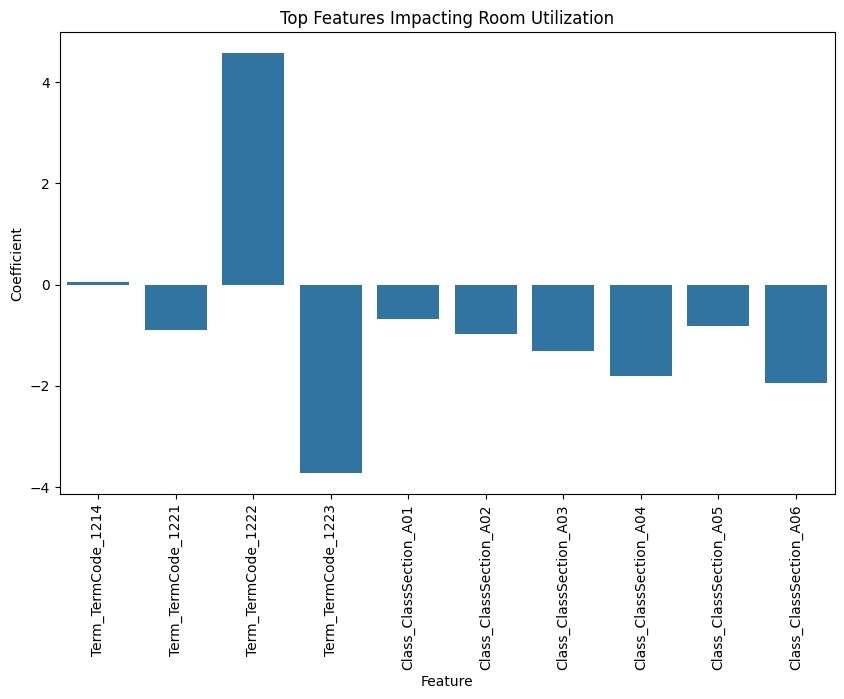

In [ ]:
#  visualize top 10 features
top_features = coefs.head(10)
import matplotlib.pyplot as plt

# Create a bar chart of the top features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.index, y=top_features)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top Features Impacting Room Utilization')
plt.show()


# make predictions

In [ ]:


# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the first 10 predictions
print(y_pred[:10])


[ 7.70502124 14.38701067  2.21134284  5.33171613  1.00982199  2.69174897
  4.29970854  0.83966245  6.82151967  2.87921995]


# Making Single Predictions with user input

Note that the code below is a prompt and responses must be entered to proceed.
Appears in top of window for VSCode

In [ ]:

# Create a dictionary to store the user input
user_input = {}

# Get the user input for each feature

user_input['Term_TermCode'] = input('Enter the term code(e.g., 1214): ')
user_input['Class_ClassSection'] = input('Enter the class section (ex. H01): ')
user_input['CourseCatalog_CourseTitleName'] = input('Enter the course title( ex. Business Computer Applications): ')
user_input['CourseOffer_Subject'] = input('Enter the course subject(ex:BUSD): ')
user_input['Class_InstructionMode'] = input('Enter the class instruction mode(ex. Hyflex): ')
user_input['Day_of_Week'] = input('Enter the day of the week(ex. Monday): ')
user_input['Hour'] = int(input('Enter the hour of the day(ex 1,2 ...24): '))

# Convert the user input to a DataFrame
user_input_df = pd.DataFrame(user_input, index=[0])

# Encode the categorical variables
user_input_encoded = encoder.transform(user_input_df[['Term_TermCode', 'Class_ClassSection', 'CourseCatalog_CourseTitleName', 'Class_InstructionMode', 'CourseOffer_Subject', 'Day_of_Week', 'Hour']])

# Make a prediction
prediction = model.predict(user_input_encoded)

# Print the prediction
print(f"Predicted maximum occupancy: {prediction[0]}")


In [ ]:
user_input_df

In [ ]:
#  if predicted value is less than 20 recommend a Facility_ID with Facility_PersonCapacity of 45 else 55

if prediction[0] < 20:
    print("Recommended Facility ID with Facility Person Capacity of 45:")
    # Assuming your initial  DataFrame is called 'data' and still contains the Facility ID and Facility Person Capacity information
    recommended_facilities = data[(data['Facility_PersonCapacity'] == 45)]
    print(recommended_facilities['Facility_ID'].unique())
else:
    print("Recommended Facility ID with Facility Person Capacity of 55:")
    # Assuming your initial DataFrame is called 'data' and of course  still contains the Facility ID and Facility Person Capacity information
    recommended_facilities = data[(data['Facility_PersonCapacity'] == 55)]
    print(recommended_facilities['Facility_ID'].unique())


# Interview Readiness questions

Given the findings from the space utilization project, what are your team's recommendations to improve attendance on campus, even when students have the option to attend online and there's no penalty for missed classes.

#  Deployment: Download model

In [ ]:
pip install joblib

In [ ]:


import joblib
joblib.dump(model, 'model.joblib')


# Download preprocessing steps encoder file




In [ ]:
#  download encoder file

joblib.dump(encoder, 'encoder.joblib')

In [ ]:
data3

In [ ]:
# deploy on dash . prompt user input and make recommendation

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the pre-trained model
model = joblib.load('model.joblib')

# Create a Dash application
app = dash.Dash(__name__)

# Create a layout for the Dash app
app.layout = html.Div([
    html.H1('Classroom Utilization Recommendation System'),
    html.P('Enter the following information to get a recommendation for the optimal facility ID based on predicted maximum occupancy:'),
    dcc.Dropdown(
        id='term-dropdown',
        options=[
            {'label': term, 'value': term} for term in data['Term_TermCode'].unique()
        ],
        value=data['Term_TermCode'].unique()[0],  # Default value
        clearable=False,
        style={"width": "50%"}
    ),
    dcc.Input(id='class-section-input', placeholder='Enter the class section (ex. H01)', style={"width": "50%"}),
    dcc.Input(id='course-title-input', placeholder='Enter the course title( ex. Business Computer Applications)', style={"width": "50%"}),
    dcc.Input(id='course-subject-input', placeholder='Enter the course subject(ex:BUSD)', style={"width": "50%"}),
    dcc.Dropdown(
        id='instruction-mode-dropdown',
        options=[
            {'label': mode, 'value': mode} for mode in data['Class_InstructionMode'].unique()
        ],
        value=data['Class_InstructionMode'].unique()[0],  # Default value
        clearable=False,
        style={"width": "50%"}
    ),
    # dcc.Input(id='facility-id-input', placeholder='Enter the facility ID (ex. 3-172)', style={"width": "50%"}),
    # dcc.Input(id='facility-capacity-input', placeholder='Enter the facility person capacity(ex. 45 or 55)', style={"width": "50%"}),
    dcc.Dropdown(
        id='day-of-week-dropdown',
        options=[
            {'label': day, 'value': day} for day in data['Day_of_Week'].unique()
        ],
        value=data['Day_of_Week'].unique()[0],  # Default value
        clearable=False,
        style={"width": "50%"}
    ),
    dcc.Input(id='hour-input', placeholder='Enter the hour of the day(ex 1,2 ...24)', style={"width": "50%"}),
    html.Br(),
    html.Button('Get Recommendation', id='submit-button', n_clicks=0),
    html.Div(id='recommendation-output')
])

# Callback for making a prediction and generating a recommendation
@app.callback(
    Output('recommendation-output', 'children'),
    [Input('submit-button', 'n_clicks')],
    [State('term-dropdown', 'value'),
     State('class-section-input', 'value'),
     State('course-title-input', 'value'),
     State('course-subject-input', 'value'),
     State('instruction-mode-dropdown', 'value'),
    #  State('facility-id-input', 'value'),
    #  State('facility-capacity-input', 'value'),
     State('day-of-week-dropdown', 'value'),
     State('hour-input', 'value')]
)
def make_recommendation(n_clicks, term, class_section, course_title, course_subject, instruction_mode, facility_id, facility_capacity, day_of_week, hour):
    # Create a dictionary to store the user input
    user_input = {
        'Term_TermCode': term,
        'Class_ClassSection': class_section,
        'CourseCatalog_CourseTitleName': course_title,
        'CourseOffer_Subject': course_subject,
        'Class_InstructionMode': instruction_mode,
        # 'Facility_ID': facility_id,
        # 'Facility_PersonCapacity': int(facility_capacity),
        'Day_of_Week': day_of_week,
        'Hour': int(hour)
    }

    # Convert the user input to a DataFrame
    user_input_df = pd.DataFrame(user_input, index=[0])

    # Encode the categorical variables
    encoder = joblib.load('encoder.joblib')  # Assuming you have saved the encoder
    user_input_encoded = encoder.transform(user_input_df[['Term_TermCode', 'Class_ClassSection', 'CourseCatalog_CourseTitleName', 'Class_InstructionMode', 'CourseOffer_Subject', 'Day_of_Week', 'Hour']])

    # Make a prediction
    prediction = model.predict(user_input_encoded)

    # Generate a recommendation
    # Update the recommendation generation logic
    if prediction[0] < 20:
      recommendation = f"Recommended Facility ID with Facility Person Capacity of 45: {data3[data3['Facility_PersonCapacity'] == 45]['Facility_ID'].unique()}"
    else:
      recommendation = f"Recommended Facility ID with Facility Person Capacity of 55: {data3[data3['Facility_PersonCapacity'] == 55]['Facility_ID'].unique()}"

    return html.Div([
        html.P(f"Predicted maximum occupancy: {prediction[0]}"),
        html.P(recommendation)
    ])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import joblib

# Load the pre-trained model and required data
model = joblib.load('model.joblib')
encoder = joblib.load('encoder.joblib')

# Create a Dash application
app = dash.Dash(__name__)

# Add external CSS for styling
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Create a layout for the Dash app
app.layout = html.Div([
    html.H1('Classroom Utilization Recommendation System', className='display-4'),
    html.P('Enter the following information to get a recommendation for the optimal facility ID based on predicted maximum occupancy:'),
    html.Div([
        dcc.Dropdown(
            id='term-dropdown',
            options=[
                {'label': term, 'value': term} for term in data['Term_TermCode'].unique()
            ],
            value=data['Term_TermCode'].unique()[0],  # Default value
            clearable=False,
            className='form-control mb-2'
        ),
        dcc.Input(id='class-section-input', placeholder='Enter the class section (ex. H01)', className='form-control mb-2'),
        dcc.Input(id='course-title-input', placeholder='Enter the course title( ex. Business Computer Applications)', className='form-control mb-2'),
        dcc.Input(id='course-subject-input', placeholder='Enter the course subject(ex:BUSD)', className='form-control mb-2'),
        dcc.Dropdown(
            id='instruction-mode-dropdown',
            options=[
                {'label': mode, 'value': mode} for mode in data['Class_InstructionMode'].unique()
            ],
            value=data['Class_InstructionMode'].unique()[0],  # Default value
            clearable=False,
            className='form-control mb-2'
        ),
        dcc.Dropdown(
            id='day-of-week-dropdown',
            options=[
                {'label': day, 'value': day} for day in data['Day_of_Week'].unique()
            ],
            value=data['Day_of_Week'].unique()[0],  # Default value
            clearable=False,
            className='form-control mb-2'
        ),
        dcc.Input(id='hour-input', placeholder='Enter the hour of the day(ex 1,2 ...24)', className='form-control mb-2'),
        html.Button('Get Recommendation', id='submit-button', n_clicks=0, className='btn btn-primary')
    ], className='jumbotron'),
    html.Div(id='recommendation-output')
])

# Callback for making a prediction and generating a recommendation
@app.callback(
    Output('recommendation-output', 'children'),
    [Input('submit-button', 'n_clicks')],
    [State('term-dropdown', 'value'),
     State('class-section-input', 'value'),
     State('course-title-input', 'value'),
     State('course-subject-input', 'value'),
     State('instruction-mode-dropdown', 'value'),
     State('day-of-week-dropdown', 'value'),
     State('hour-input', 'value')]
)
def make_recommendation(n_clicks, term, class_section, course_title, course_subject, instruction_mode, day_of_week, hour):
    if n_clicks > 0:
        try:
            # Create a dictionary to store the user input
            user_input = {
                'Term_TermCode': term,
                'Class_ClassSection': class_section,
                'CourseCatalog_CourseTitleName': course_title,
                'CourseOffer_Subject': course_subject,
                'Class_InstructionMode': instruction_mode,
                'Day_of_Week': day_of_week,
                'Hour': int(hour)
            }

            # Convert the user input to a DataFrame
            user_input_df = pd.DataFrame(user_input, index=[0])

            # Encode the categorical variables
            user_input_encoded = encoder.transform(user_input_df[['Term_TermCode', 'Class_ClassSection', 'CourseCatalog_CourseTitleName', 'Class_InstructionMode', 'CourseOffer_Subject', 'Day_of_Week', 'Hour']])

            # Make a prediction
            prediction = model.predict(user_input_encoded)

            # Generate a recommendation
            if prediction[0] < 20:
                recommendation = f"Recommended Facility ID with Facility Person Capacity of 45: {data[(data['Facility_PersonCapacity'] == 55)]['Facility_ID'].unique()}"
            else:
                recommendation = f"Recommended Facility ID with Facility Person Capacity of 55: {data[(data['Facility_PersonCapacity'] == 45)]['Facility_ID'].unique()}"

            return html.Div([
                html.P(f"Predicted maximum occupancy: {prediction[0]}"),
                html.P(recommendation)
            ])
        except Exception as e:
            return html.Div([
                html.P("An error occurred while processing the recommendation."),
                html.P(f"Error details: {str(e)}")
            ])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import joblib

# Load the pre-trained model and required data
model = joblib.load('model.joblib')
encoder = joblib.load('encoder.joblib')

# Create a Dash application
app = dash.Dash(__name__)

# Add external CSS for styling
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Create a layout for the Dash app
app.layout = html.Div([
    html.H1('Classroom Utilization Recommendation System', className='display-4'),
    html.P('Enter the following information to get a recommendation for the optimal facility ID based on predicted maximum occupancy:'),
    html.Div([
        dcc.Dropdown(
            id='term-dropdown',
            options=[
                {'label': term, 'value': term} for term in data['Term_TermCode'].unique()
            ],
            value=data['Term_TermCode'].unique()[0],  # Default value
            clearable=False,
            className='form-control mb-2'
        ),
        dcc.Input(id='class-section-input', placeholder='Enter the class section (ex. H01)', className='form-control mb-2'),
        dcc.Input(id='course-title-input', placeholder='Enter the course title( ex. Business Computer Applications)', className='form-control mb-2'),
        dcc.Input(id='course-subject-input', placeholder='Enter the course subject(ex:BUSD)', className='form-control mb-2'),
        dcc.Dropdown(
            id='instruction-mode-dropdown',
            options=[
                {'label': mode, 'value': mode} for mode in data['Class_InstructionMode'].unique()
            ],
            value=data['Class_InstructionMode'].unique()[0],  # Default value
            clearable=False,
            className='form-control mb-2'
        ),
        dcc.Dropdown(
            id='day-of-week-dropdown',
            options=[
                {'label': day, 'value': day} for day in data['Day_of_Week'].unique()
            ],
            value=data['Day_of_Week'].unique()[0],  # Default value
            clearable=False,
            className='form-control mb-2'
        ),
        dcc.Input(id='hour-input', placeholder='Enter the hour of the day(ex 1,2 ...24)', className='form-control mb-2'),
        html.Button('Get Recommendation', id='submit-button', n_clicks=0, className='btn btn-primary')
    ], className='jumbotron'),
    html.Div(id='recommendation-output')
])

# Callback for making a prediction and generating a recommendation
@app.callback(
    Output('recommendation-output', 'children'),
    [Input('submit-button', 'n_clicks')],
    [State('term-dropdown', 'value'),
     State('class-section-input', 'value'),
     State('course-title-input', 'value'),
     State('course-subject-input', 'value'),
     State('instruction-mode-dropdown', 'value'),
     State('day-of-week-dropdown', 'value'),
     State('hour-input', 'value')]
)
def make_recommendation(n_clicks, term, class_section, course_title, course_subject, instruction_mode, day_of_week, hour):
    if n_clicks > 0:
        try:
            # Create a dictionary to store the user input
            user_input = {
                'Term_TermCode': term,
                'Class_ClassSection': class_section,
                'CourseCatalog_CourseTitleName': course_title,
                'CourseOffer_Subject': course_subject,
                'Class_InstructionMode': instruction_mode,
                'Day_of_Week': day_of_week,
                'Hour': int(hour)
            }

            # Convert the user input to a DataFrame
            user_input_df = pd.DataFrame(user_input, index=[0])

            # Encode the categorical variables
            user_input_encoded = encoder.transform(user_input_df[['Term_TermCode', 'Class_ClassSection', 'CourseCatalog_CourseTitleName', 'Class_InstructionMode', 'CourseOffer_Subject', 'Day_of_Week', 'Hour']])

            # Make a prediction
            prediction = model.predict(user_input_encoded)

            # Generate a recommendation
            if prediction[0] < 20:
                recommendation = f"Recommended Facility ID with Facility Person Capacity of 45: {data[(data['Facility_PersonCapacity'] == 55)]['Facility_ID'].unique()}"
            else:
                recommendation = f"Recommended Facility ID with Facility Person Capacity of 55: {data[(data['Facility_PersonCapacity'] == 45)]['Facility_ID'].unique()}"

            return html.Div([
                html.P(f"Predicted maximum occupancy: {abs(prediction[0])}"),
                html.P(recommendation)
            ])
        except Exception as e:
            return html.Div([
                html.P("An error occurred while processing the recommendation."),
                html.P(f"Error details: {str(e)}")
            ])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


# Interview Readiness questions

Given the findings from the space utilization project, what are your team's recommendations to improve attendance on campus, even when students have the option to attend online and there's no penalty for missed classes.

Answer

:

1. **Hybrid Model Optimization**: Since there is high attendance for business classes, use these as a model for other departments. Investigate what aspects of these classes drive attendance (e.g., teaching methods, class engagement, practical applications) and apply these practices across other courses.

2. **Enhanced On-Campus Experience**: Improve the overall campus experience to make physical attendance more appealing. This could include upgrading facilities, enhancing social areas, providing more on-campus resources and activities, or improving the learning environment on the 3rd floor where attendance is already high.

3. **Incentivize Physical Attendance**: While there’s no penalty for missing classes, creating positive incentives for attendance can be effective. This could include participation points, on-site extracurricular workshops, guest speaker sessions, networking events, or other unique experiences that are only available in person.

4. **Schedule Optimization**: Analyze class schedules to ensure they are convenient for students, possibly clustering classes in ways that minimize gaps and make coming to campus more worthwhile. Offer popular or required courses at times that are known to have higher attendance.

5. **Improve Classroom Utilization**: For underutilized facilities, consider repurposing them for activities or services that attract students to campus, like study lounges, tutoring centers, or collaborative workspaces.

6. **Marketing and Communication**: Promote the benefits of in-person attendance through effective communication strategies. Highlight the advantages of on-campus learning, such as networking opportunities, immediate access to faculty, and hands-on experiences.

7. **Feedback and Continuous Improvement**: Regularly gather feedback from students about their preferences and barriers to attending in person. Use this data to make continuous improvements and adapt strategies to meet students' evolving needs and expectations.

